【项目06】  多场景下的图表可视化表达

课程数据：
2016年奥运运动员数据，数据格式为xlsx，分3个sheet

作业要求：
1、分男女分别分析运动员的身高分布，并制作图表，数据为“奥运运动员数据.xlsx，sheet → 运动员信息”
要求：
① 制作分布密度图
② 计算出男女平均身高，并绘制辅助线表示
提示：
① 可视化制图方法 → sns.distplot()
② 辅助线制图方法 → plt.axvline()
③ 分男女分别筛选数据并制作图表
④ 不需要创建函数
 

 
2、综合指标判断运动员的身材，并找到TOP8的运动员，并制作图表，数据为“奥运运动员数据.xlsx，sheet → 运动员信息”
要求：
① 针对不同指标，绘制面积堆叠图
② TOP8的运动员，绘制雷达图表示
提示：
① 四个指标评判运动员身材，并加权平均
   a. BMI 指数（BMI =体重kg ÷ 身高m**2，详细信息可百度查询）→ 越接近22分数越高
   b. 腿长/身高 指数 → 数据筛选，只选取小于0.7的数据，越大分数越高
   c. 臂展/身高 指数 → 数据筛选，只选取大于0.7的数据，比值越接近1分数越高
   d. 年龄 指数 → 年龄越小分数越高
   对上述abcd指标分别标准化得到n1,n2,n3,n4（划分到0-1的分值）
   最后评分： finalscore = (n1 + n2 + n3 + n4)/4
② 制作堆叠面积图，data.plot.area()
③ 雷达图需要构建子图 + for循环遍历得到
 
 
 
3、根据运动员CP数据，分析出CP综合热度，通过python处理数据并导出，在Gephi中绘制图表，数据为“奥运运动员数据.xlsx，sheet → 运动员CP热度”
要求：
① 用python计算出综合热度指标
② 用Gephi绘制关系可视化图表
提示：
① 三个指标评判运动员CP综合热度，并加权平均
   a. cp微博数量 → 数量越多分数越高
   b. cp微博话题阅读量 → 阅读量越多分数越高
   c. B站cp视频播放量 → 播放量越大分数越高
   对上述abcd指标分别标准化得到n1,n2,n3,n4（划分到0-1的分值）
   最后评分： finalscore = n1*0.5 + n2*0.3 + n3*0.2
② Gephi中布局模式选择“ForceAtlas2”
③ Gephi中通过模块化计算，给关联结果做分组，并且以此分组设定点颜色
 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

     event name   age birthplace  attend2016  attend2012  attend2008  \
0  fencing   雷声  32.0         天津         1.0         1.0         1.0   
1  fencing  孙玉洁  24.0         辽宁         1.0         1.0         NaN   
2  fencing   仲满  33.0         江苏         NaN         1.0         1.0   
3  fencing  孙一文  24.0         山东         1.0         NaN         NaN   
4  fencing  郝佳露  29.0         山西         1.0         NaN         NaN   

   attendtimes  gold  silver  bronze medal   xz gender   birthday  height  \
0          3.0   1.0     NaN     NaN     1  双鱼座      男 1984-03-07     193   
1          2.0   1.0     1.0     1.0     3  狮子座      女 1992-08-10     185   
2          2.0   1.0     NaN     NaN     1  双鱼座      男 1983-02-28     190   
3          1.0   NaN     1.0     1.0     2  双子座      女 1992-06-17     176   
4          1.0   NaN     1.0     NaN     1  狮子座      女 1987-08-20     174   

   weight    arm    leg  
0    75.0  194.0  110.0  
1    72.0  180.0    NaN  
2    76.0  194.0  114.0  


Text(0.5,1,'Athlete height')

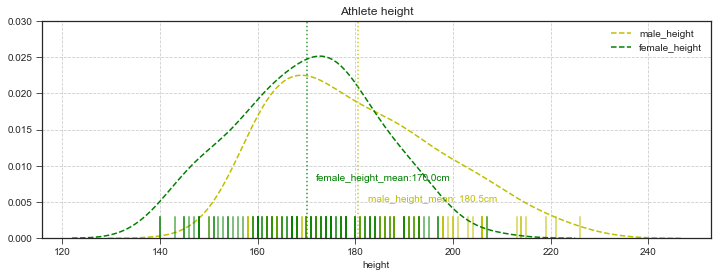

In [2]:
'''
1、分男女分别分析运动员的身高分布，并制作图表，数据为“奥运运动员数据.xlsx，sheet → 运动员信息”
要求：
① 制作分布密度图
② 计算出男女平均身高，并绘制辅助线表示
提示：
① 可视化制图方法 → sns.distplot()
② 辅助线制图方法 → plt.axvline()
③ 分男女分别筛选数据并制作图表
④ 不需要创建函数
'''
os.chdir('D:\\user_profile\\python\\project\\6\\')                # 奥运运动员数据

df = pd.read_excel('奥运运动员数据.xlsx',sheet_name=1,header=0)   # 查看数据
df_length = len(df)
df_columns = df.columns.tolist()
print(df.head(5))

data = df[['event','name','height','weight','gender']]             # 提取数据
data.dropna(inplace=True)                                          # 去掉缺失值
data_male = data[data['gender']=='男']                             # 筛选数据，按照目标字段筛选
data_female = data[data['gender']=='女']                           # 提取男女数据

hmean_male = data_male['height'].mean()
hmean_female = data_female['height'].mean()                         # 计算男女平均身高

sns.set_style('ticks')
plt.figure(figsize=(12,4))

sns.distplot(data_male['height'],hist=False,kde=True,rug=True,
             rug_kws={'color':'y','lw':2,'alpha':0.5,'height':0.1}, # 设置数据频率分布颜色
             kde_kws={'color':'y','lw':1.5,'linestyle':'--'},       # 设置密度曲线颜色，线宽，标注、线形
             label='male_height')

sns.distplot(data_female['height'],hist=False,kde=True,rug=True,
             rug_kws={'color':'g','lw':2,'alpha':0.5,'height':0.1},
             kde_kws={'color':'g','lw':1.5,'linestyle':'--'},
             label='female_height')

plt.axvline(hmean_male,color='y',linestyle=':',alpha=.8)
plt.text(hmean_male+2,0.005,'male_height_mean: %.1fcm'%(hmean_male),color='y')

plt.axvline(hmean_female,color='g',linestyle=':',alpha=.8)
plt.text(hmean_female+2,0.008,'female_height_mean:%.1fcm'%(hmean_female),color='g')

plt.ylim([0,0.03])
plt.grid(linestyle='--')
plt.title('Athlete height')

0    司雅杰
1     曹缘
2    于丰铠
3    许安琪
4    张雁全
5     沈铎
6    傅园慧
7    李雪英
Name: name, dtype: object


<Figure size 864x432 with 0 Axes>

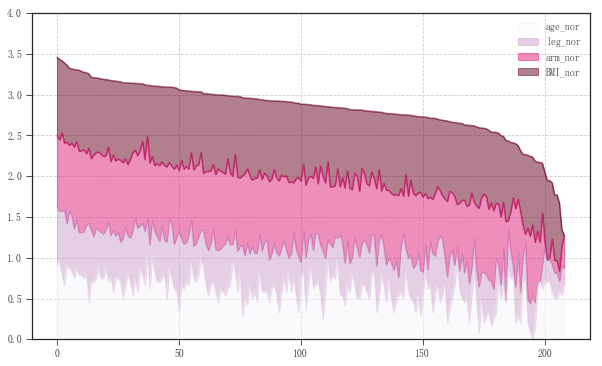

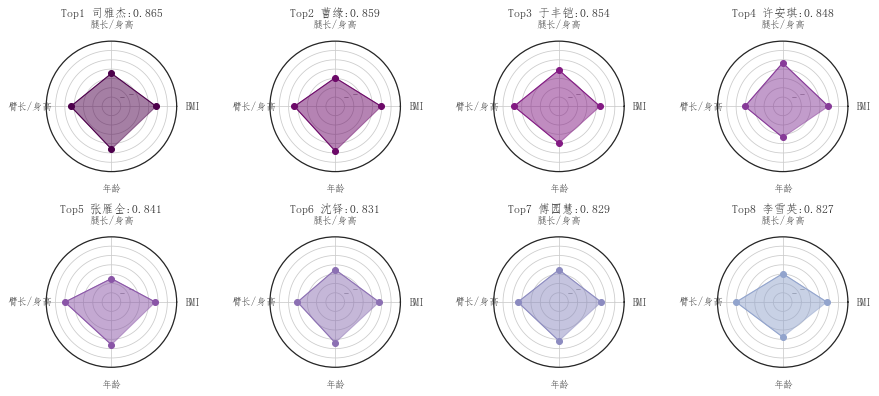

In [57]:
'''
2、综合指标判断运动员的身材，并找到TOP8的运动员，并制作图表，数据为“奥运运动员数据.xlsx，sheet → 运动员信息”
要求：
① 针对不同指标，绘制面积堆叠图
② TOP8的运动员，绘制雷达图表示
提示：
① 四个指标评判运动员身材，并加权平均
   a. BMI 指数（BMI =体重kg ÷ 身高m**2，详细信息可百度查询）→ 越接近22分数越高
   b. 腿长/身高 指数 → 数据筛选，只选取小于0.7的数据，越大分数越高
   c. 臂展/身高 指数 → 数据筛选，只选取大于0.7的数据，比值越接近1分数越高
   d. 年龄 指数 → 年龄越小分数越高
   对上述abcd指标分别标准化得到n1,n2,n3,n4（划分到0-1的分值）
   最后评分： finalscore = (n1 + n2 + n3 + n4)/4
② 制作堆叠面积图，data.plot.area()
③ 雷达图需要构建子图 + for循环遍历得到
'''
data2 = df[['event','name','age','gender','height','weight','arm','leg']]    # 获取需要的数据
data2.dropna(inplace=True)                                                   # 去除空值

data2['BMI'] = data2['weight']/(data2['height']/100)**2                      # 计算BMI指数
data2['leg/h'] = data2['leg']/data2['height']                                # 计算腿长/身高指数
data2['arm/h'] = data2['arm']/data2['height']                                # 计算臂长/身高指数

data2 = data2[data2['leg/h']<0.7]                                            # 只选取小于0.7的数据
data2 = data2[data2['arm/h']>0.7]                                            # 只选取大于0.7的数据    

data_re = data2[['event','name','BMI','leg/h','arm/h','age']]                # 重新生成数据集

data_re['BMI_assess'] = np.abs(data_re['BMI']-22)                            # 重新评估BMI,越接近22分数越高
data_re['leg_assess'] = data_re['leg/h']                                  
data_re['arm_assess'] = np.abs(data_re['arm/h']-1)                           # 重新评估臂长指数,比值越接近1分数越高
data_re['age_assess'] = data_re['age']
#print(data_re)

# 标准化各项数据
data_re['BMI_nor'] = (data_re['BMI_assess'].max() - data_re['BMI_assess'])/(data_re['BMI_assess'].max()-data_re['BMI_assess'].min())
data_re['leg_nor'] = (data_re['leg_assess'] - data_re['leg_assess'].min())/(data_re['leg_assess'].max()-data_re['leg_assess'].min())
data_re['arm_nor'] = (data_re['arm_assess'].max() - data_re['arm_assess'])/(data_re['arm_assess'].max()-data_re['arm_assess'].min())
data_re['age_nor'] = (data_re['age_assess'].max() - data_re['age_assess'])/(data_re['age_assess'].max()-data_re['age_assess'].min())

# 计算总体得分
data_re['final'] = (data_re['BMI_nor']+data_re['leg_nor']+data_re['arm_nor']+data_re['age_nor'])/4

plt.figure(figsize=(12,6))
data_re.sort_values(by='final',inplace=True,ascending=False)                 # 对总指标进行排序
data_re.reset_index(inplace=True)

# 作出面积图
data_re[['age_nor','leg_nor','arm_nor','BMI_nor']].plot.area(colormap='PuRd',alpha=.5,figsize=(10,6))
plt.ylim([0,4])
plt.grid(linestyle='--')

'''
(2) 解读身材最好的前8位运动员
'''
datatop8 = data_re[:8]                                                      # 获取前8名身体素质最好的运动员
fig = plt.figure(figsize=(15,6))
plt.subplots_adjust(wspace=.35,hspace=.5)
print(datatop8['name'])

n = 0
for i in datatop8['name'].tolist():                                         # 根据运动员的姓名进行循环
    n += 1                                                                   
    c = plt.cm.BuPu_r(np.linspace(0, 0.7,10))[n-1]                          # 设置调色盘                                   
    axi = plt.subplot(2,4,n, projection = 'polar')                          # 设置图表类型 
    
                                                                            # 根据姓名来获取身体参数
    datai = datatop8[['BMI_nor','leg_nor','arm_nor','age_nor']][datatop8['name']==i].T                                                                                                                                                                                                                      
    scorei = datatop8['final'][datatop8['name']==i]                         # 获取综合得分参数    
    
    angles = np.linspace(0, 2*np.pi, 4, endpoint=False)                     # 设置角度
    #axi.plot(angles,datai,linestyle = '-',lw=1,color = c)
    plt.polar(angles, datai, 'o-', linewidth=1,color = c)                   # 分别绘制每个运动员的评分雷达图
    axi.fill(angles,datai,alpha=0.5,color=c)
    axi.set_thetagrids(np.arange(0.0, 360.0, 90),['BMI','腿长/身高','臂长/身高','年龄'])
    axi.set_rgrids(np.arange(0.2,1.5,0.2),'--')
    plt.title('Top%i %s:%.3f\n'%(n,i,scorei))

In [58]:
'''
3、根据运动员CP数据，分析出CP综合热度，通过python处理数据并导出，在Gephi中绘制图表，数据为“奥运运动员数据.xlsx，sheet → 运动员CP热度”
要求：
① 用python计算出综合热度指标
② 用Gephi绘制关系可视化图表
提示：
① 三个指标评判运动员CP综合热度，并加权平均
   a. cp微博数量 → 数量越多分数越高
   b. cp微博话题阅读量 → 阅读量越多分数越高
   c. B站cp视频播放量 → 播放量越大分数越高
   对上述abcd指标分别标准化得到n1,n2,n3,n4（划分到0-1的分值）
   最后评分： finalscore = n1*0.5 + n2*0.3 + n3*0.2
② Gephi中布局模式选择“ForceAtlas2”
③ Gephi中通过模块化计算，给关联结果做分组，并且以此分组设定点颜色

'''

df = pd.read_excel('奥运运动员数据.xlsx',sheet_name=2,header=0)          # 获取第二页的数据
df.replace([np.nan,'无数据','无贴吧'],0,inplace=True)                    # 去除空值

# 标准化数据
df['n1'] = (df['cp微博数量']-df['cp微博数量'].min()) / (df['cp微博数量'].max()-df['cp微博数量'].min())
df['n2'] = (df['cp微博话题阅读量']-df['cp微博话题阅读量'].min()) / (df['cp微博话题阅读量'].max()-df['cp微博话题阅读量'].min())
df['n3'] = (df['B站cp视频播放量']-df['B站cp视频播放量'].min()) / (df['B站cp视频播放量'].max()-df['B站cp视频播放量'].min())
df['f'] = df['n1']*0.5+df['n2']*0.3+df['n3']*0.2                         # 计算得分  

df.sort_values(by='f',inplace=True,ascending=False)                      # 排序
df.reset_index(inplace=True)

result = df[['p1','p2','f']]                                              # 写文件 
writer = pd.ExcelWriter('output.xlsx')
result.to_excel(writer,'sheet1')   
writer.save()